In [16]:
import pandas as pd
import numpy as np
import os
import datetime

import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/pbenson/Documents/Min_Max_Project')

In [5]:
takary_rec = pd.read_csv('Data/main_parts_recommendation_for_takary.csv', index_col=0)

In [6]:
takary_rec

,TXN - Item ID,monthly_usage,leadtime_month_padding,Qty On Hand,On Hand Value,fmis_min,fmis_roq,final_min,6_month_roq,TXN - Item Group,unit_cost
0,170009,10.833333,3.233333,100.0,282.0000,0.0,0.0,35.0,65.0,00,2.8200
1,176001,5.375000,1.033333,14.0,240.4402,10.0,10.0,16.0,32.0,76,17.1743
2,207001,6.500000,1.653333,58.0,856.0800,12.0,17.0,20.0,39.0,73,14.7600
3,250113,188.708333,2.773333,500.0,56.4000,500.0,500.0,566.0,1132.0,00,0.1128
4,250125,106.250000,1.553333,1000.0,8388.0000,0.0,367.0,319.0,638.0,00,8.3880
...,...,...,...,...,...,...,...,...,...,...,...
4985,45050130,1.958333,4.426667,65.0,8593.1170,40.0,40.0,9.0,12.0,73,132.2018
4986,45050134,1.416667,3.240000,20.0,278.6480,12.0,10.0,5.0,8.0,73,13.9324
4987,45050135,2.750000,2.813333,70.0,455.0000,8.0,8.0,8.0,16.0,73,6.5000
4988,598742,1.291667,1.000000,0.0,0.0000,0.0,1.0,4.0,8.0,82,0.0000


In [13]:
exclude_groups = ['58', '71', '51', '70', '73', '75', '72', '77', '74', '76', 
                  '78', '52', '53', '54', '55', '57', '64', '79']

In [14]:
filtered_takary_rec = takary_rec.loc[(takary_rec['unit_cost'] < 500) & (~takary_rec['TXN - Item Group'].isin(exclude_groups))]

In [15]:
filtered_takary_rec

,TXN - Item ID,monthly_usage,leadtime_month_padding,Qty On Hand,On Hand Value,fmis_min,fmis_roq,final_min,6_month_roq,TXN - Item Group,unit_cost
0,170009,10.833333,3.233333,100.0,282.0000,0.0,0.0,35.0,65.0,00,2.8200
3,250113,188.708333,2.773333,500.0,56.4000,500.0,500.0,566.0,1132.0,00,0.1128
4,250125,106.250000,1.553333,1000.0,8388.0000,0.0,367.0,319.0,638.0,00,8.3880
6,250128,104.166667,2.026667,3000.0,6120.0000,500.0,500.0,312.0,625.0,00,2.0400
7,250133,137.500000,2.266667,1500.0,945.0000,500.0,1000.0,412.0,825.0,00,0.6300
...,...,...,...,...,...,...,...,...,...,...,...
4924,42694104,1.416667,4.540000,84.0,376.4964,32.0,12.0,6.0,8.0,00,4.4821
4960,43209002,1.625000,1.900000,3.0,97.5900,6.0,6.0,5.0,10.0,09,32.5300
4979,45020001,6.458333,1.940000,5620.0,38282.8780,10.0,10.0,19.0,39.0,00,6.8119
4988,598742,1.291667,1.000000,0.0,0.0000,0.0,1.0,4.0,8.0,82,0.0000


In [17]:
print(filtered_takary_rec['leadtime_month_padding'].mean())
print(takary_rec['leadtime_month_padding'].mean())

1.921704740148486
2.3663434647071844


In [19]:
for column in ['leadtime_month_padding', 'On Hand Value', 'unit_cost']:
    print('Unfiltered {}:'.format(column))
    print(takary_rec[column].mean())
    print('Filtered {}:'.format(column))
    print(filtered_takary_rec[column].mean())

Unfiltered leadtime_month_padding:
2.3663434647071844
Filtered leadtime_month_padding:
1.921704740148486
Unfiltered On Hand Value:
3556.7970269138145
Filtered On Hand Value:
1942.5099119645943
Unfiltered unit_cost:
130.41769328657355
Filtered unit_cost:
47.25832030268427


(array([2699.,  597.,  140.,   46.,    8.,    4.,    5.,    0.,    0.,
           3.]),
 array([ 1.        ,  2.20066667,  3.40133333,  4.602     ,  5.80266667,
         7.00333333,  8.204     ,  9.40466667, 10.60533333, 11.806     ,
        13.00666667]),
 <BarContainer object of 10 artists>)

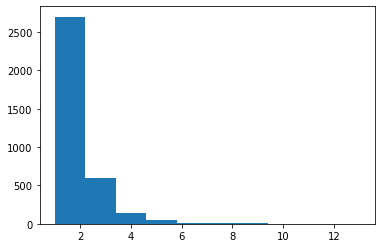

In [20]:
plt.hist(filtered_takary_rec['leadtime_month_padding'])

(array([3.444e+03, 9.840e+02, 3.400e+02, 1.240e+02, 5.400e+01, 2.100e+01,
        9.000e+00, 1.000e+01, 3.000e+00, 1.000e+00]),
 array([ 1.        ,  2.45933333,  3.91866667,  5.378     ,  6.83733333,
         8.29666667,  9.756     , 11.21533333, 12.67466667, 14.134     ,
        15.59333333]),
 <BarContainer object of 10 artists>)

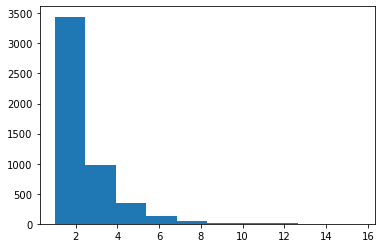

In [21]:
plt.hist(takary_rec['leadtime_month_padding'])

In [22]:
filtered_takary_rec.to_csv('Data/takary_recommendation_no_rail_cheap.csv')